# Libraries

In [1]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                   #to perform visualization with many color palettes, beatiful style and many statistical plots
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge
from sklearn.metrics import r2_score,confusion_matrix
#Visualization
from lightgbm import LGBMRegressor
# pd.set_option("display.max_rows",100)

# Import data

In [2]:
pd.set_option('display.max.columns', None) # to display all column, not separate)

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1o9cc0vMEkxWBQFe1Ydcj-_q11z_sl5bjq1vT5dilQKQ/edit#gid=624602117'
u = url.replace('/edit#gid=', '/export?format=csv&gid=') # we use this trick to export google sheet into csv file

df = pd.read_csv(u)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
# df.to_csv('../Student_performance_prediction/try.csv')

# EDA

In [5]:
eda_df = df.copy()
eda_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Numerical Data:     
- math score    
- reading score     
- writing score     

Categorical Score:      
- race/ethinicity   
- parental level of education, 
- lunch       
- test preparation course       
- gender        

In [6]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


All the categorical and numerical data are in proper data types.

In [7]:
eda_df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

No null data so far.        

In [8]:
eda_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


We can now compute various mathematical analysis in terms of count, mean, std, etc.

Create a column indices of Categorical data ( where the pandas column type is 'object')     
and Numerical data

In [9]:
# Identify the categorical features

# eda_df['math score'].dtype        ## << for int64
cat_cols = [col for col in eda_df.columns if eda_df[col].dtype=='object']
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [10]:
num_cols = [col for col in eda_df.columns if eda_df[col].dtype=='int64']
num_cols

['math score', 'reading score', 'writing score']

Unique values for each categorical column

In [11]:
for col in cat_cols:
    # print(col)
    print(df[col].unique())

['female' 'male']
['group D' 'group B' 'group C' 'group E' 'group A']
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
['standard' 'free/reduced']
['completed' 'none']


To confirm that all the categorical columns in a pandas DataFrame can be converted to the categorical data type, you can check the number of unique values in each column and the percentage of unique values relative to the total number of values in the column. If the percentage of unique values is low (e.g., less than 50%), then it's likely that the column can be converted to the categorical data type without using too much memory. However, if the percentage of unique values is high (e.g., greater than 50%), then it may not be worth converting the column to the categorical data type, as the memory savings may be minimal.

In [12]:
# Get list of categorical columns (I already calculate it before so I just copy it here just in case)
cc = cat_cols.copy()

# Loop over categorical columns
for col in cat_cols:
    unique_vals = df[col].nunique()
    total_vals = len(df[col])
    unique_percentage = ((unique_vals / total_vals) * 100)*100
    print(f"{col}: {unique_vals} unique values ({unique_percentage:.2f}% of total)")

gender: 2 unique values (20.00% of total)
race/ethnicity: 5 unique values (50.00% of total)
parental level of education: 6 unique values (60.00% of total)
lunch: 2 unique values (20.00% of total)
test preparation course: 2 unique values (20.00% of total)


Three of the categorical columns are less than 50%, so I decided to convert all of those to category data type

In [13]:
num_cols

['math score', 'reading score', 'writing score']

<Axes: >

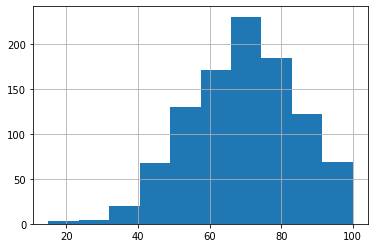

In [14]:
%matplotlib inline

# Creating Bar Chart as the Target variable is Continuous
df['writing score'].hist()

<Axes: >

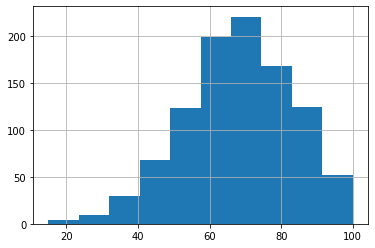

In [27]:
%matplotlib inline

# Creating Bar Chart as the Target variable is Continuous
df['math score'].hist()

<Axes: >

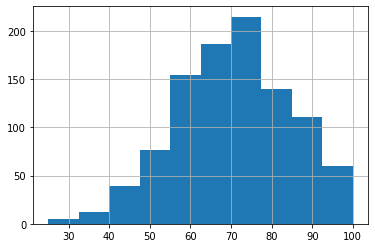

In [28]:
%matplotlib inline

# Creating Bar Chart as the Target variable is Continuous
df['reading score'].hist()

Majority of math, writing, and reading score are in between 70-78

In [15]:
df_student = df.copy()
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [16]:
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [17]:
columns = df_student.select_dtypes(include='int64').columns
columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [18]:
#Highlighting scores from lowest to highest
df_student_scores_raw = df_student.style.format({columns[0]:"{:.2f} %",
                                 columns[1]:"{:.2f} %",
                                 columns[2]:"{:.2f} %",})\
                            .background_gradient(cmap="inferno"
                                                 ,low=1,axis=1)
# df_student_scores_raw.to_excel('../Student_performance_prediction/student_scores_raw.xlsx')

In [19]:
df_student.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [20]:
print("The math score mean is {}".format(np.mean(df_student["math score"])))
print("The reading score mean is {}".format(np.mean(df_student["reading score"])))
print("The writing score mean is {}".format(np.mean(df_student["writing score"])))

The math score mean is 67.81
The reading score mean is 70.382
The writing score mean is 69.14


In [21]:
print("The math score median is {}".format(np.median(df_student["math score"])))
print("The reading score median is {}".format(np.median(df_student["reading score"])))
print("The writing score median is {}".format(np.median(df_student["writing score"])))

The math score median is 68.0
The reading score median is 70.5
The writing score median is 70.0


In [22]:
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## Data visualization

In [23]:
print('Statistic of gender:' )
df_gender = pd.DataFrame(df_student['gender'].value_counts().reset_index())
df_gender.columns = ['gender', 'total']
df_gender['percent'] = (df_gender['total'] / df_gender['total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_gender)

print('\n---------------------------------------------------\n')
print('Statistic of lunch:' )
df_lunch = pd.DataFrame(df_student['lunch'].value_counts().reset_index())
df_lunch.columns = ['lunch', 'total']
df_lunch['percent'] = (df_lunch['total'] / df_lunch['total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_lunch)

print('\n---------------------------------------------------\n')
print('Statistic of test preparation course:' )
df_test = pd.DataFrame(df_student['test preparation course'].value_counts().reset_index())
df_test.columns = ['test preparation course', 'total']
df_test['percent'] = (df_test['total'] / df_test['total'].sum() * 100).round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(df_test)

Statistic of gender:
   gender  total  percent
0    male    508     50.8
1  female    492     49.2

---------------------------------------------------

Statistic of lunch:
          lunch  total  percent
0      standard    660     66.0
1  free/reduced    340     34.0

---------------------------------------------------

Statistic of test preparation course:
  test preparation course  total  percent
0                    none    656     65.6
1               completed    344     34.4


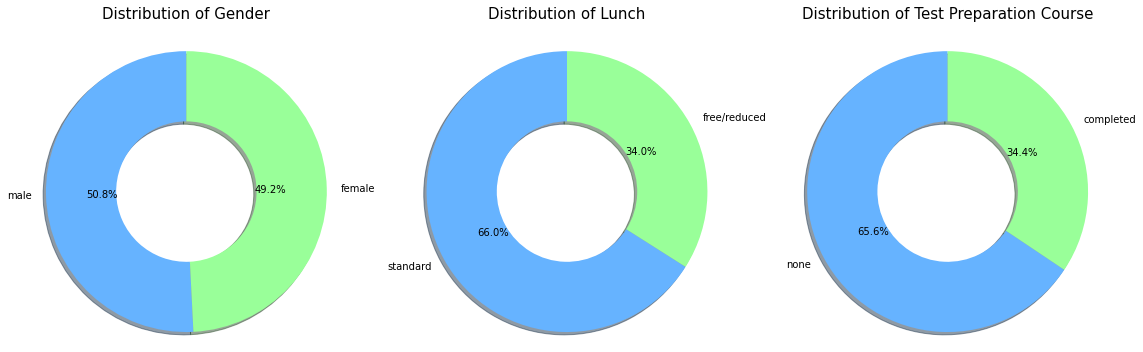

In [24]:
# Define a sample color palette
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# Create first subplot for pie chart 1
axs[0].pie(df_gender['percent'], 
           labels=df_gender['gender'], 
           autopct='%1.1f%%', 
           startangle=90, 
           shadow=True, 
           colors=colors,
           wedgeprops=dict(width=0.5))
axs[0].axis('equal')
axs[0].set_title('Distribution of Gender', pad=20, fontsize=15)

# Create second subplot for pie chart 2
axs[1].pie(df_lunch['percent'], 
           labels=df_lunch['lunch'], 
           autopct='%1.1f%%', 
           startangle=90, 
           shadow=True, 
           colors=colors,
           wedgeprops=dict(width=0.5))
axs[1].axis('equal')
axs[1].set_title('Distribution of Lunch', pad=20, fontsize=15)

# Create third subplot for pie chart 3
axs[2].pie(df_test['percent'], 
           labels=df_test['test preparation course'], 
           autopct='%1.1f%%', 
           startangle=90, 
           shadow=True, 
           colors=colors,
           wedgeprops=dict(width=0.5))
axs[2].axis('equal')
axs[2].set_title('Distribution of Test Preparation Course', pad=20, fontsize=15)

plt.tight_layout()
# Display the plot
plt.show()

INSIGHTS:       
- 50% of the students in this data are Male     
- 66% of the students are having normal lunch (not free or reduced-price)

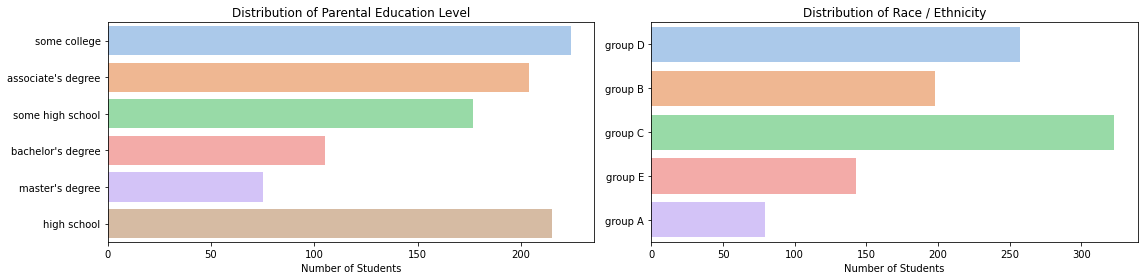

In [29]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Create the first subplot for the countplot of parental level of education
sns.countplot(y="parental level of education", data=df_student, ax=axs[0], palette=palette)
axs[0].set_title('Distribution of Parental Education Level')

# Create the second subplot for the countplot of race/ethnicity
sns.countplot(y="race/ethnicity", data=df_student, ax=axs[1], palette=palette)
axs[1].set_title('Distribution of Race / Ethnicity')

# Set the y-labels for both subplots
axs[0].set_ylabel('')
axs[1].set_ylabel('')

# Set the x-labels for both subplots
axs[0].set_xlabel('Number of Students')
axs[1].set_xlabel('Number of Students')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.5)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

INSIGHTS:       
- Majority of the parents are having some college(not completed)        
- Majority of the parents are from race group C             

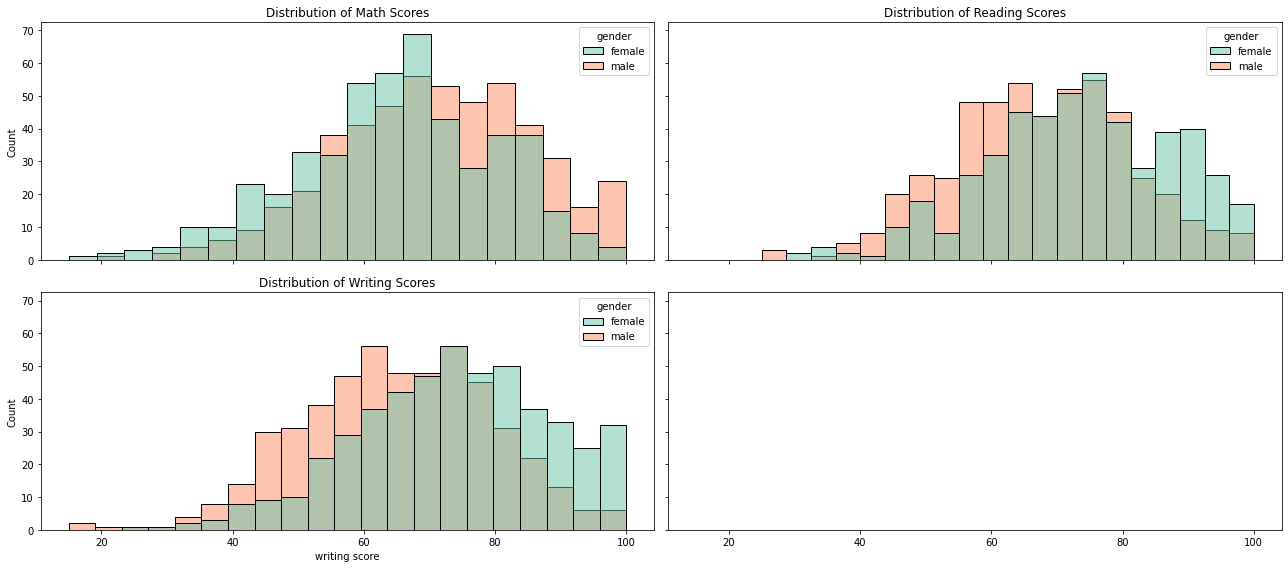

In [31]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with three subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharey=True, sharex = True)

# Create the first subplot for the distribution of math scores
sns.histplot(x="math score", data=df_student, ax=axs[0, 0], hue = 'gender', palette="Set2")
axs[0, 0].set_title('Distribution of Math Scores')

# Create the second subplot for the distribution of reading scores
sns.histplot(x="reading score", data=df_student, ax=axs[0, 1],hue = 'gender', palette="Set2")
axs[0, 1].set_title('Distribution of Reading Scores')

# Create the third subplot for the distribution of writing scores
sns.histplot(x="writing score", data=df_student, ax=axs[1, 0],hue = 'gender', palette="Set2")
axs[1, 0].set_title('Distribution of Writing Scores')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.3)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
gender_count = df_student['gender'].value_counts()

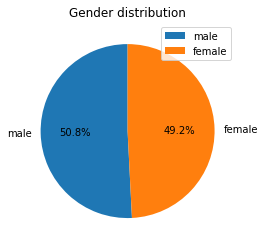

In [ ]:
# Create a pie chart
labels = gender_count.index.tolist()
sizes = gender_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Gender distribution')
plt.legend(labels, loc='best')

plt.show()

50,8% Gender in this data are Male

### Percentage visualization for Race group

In [ ]:
races_count = df_student['race/ethnicity'].value_counts()

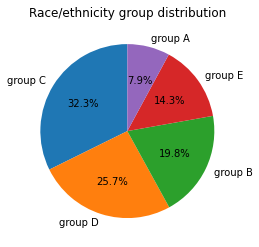

In [ ]:
# Create a pie chart
labels = races_count.index.tolist()
sizes = races_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Race/ethnicity group distribution')
# plt.legend(labels, loc='best')

plt.show()

50% of the students here are in group C and group D race/ethnicity

# Business Question

In [ ]:
df_student_copy = df_student.copy()

In [ ]:
numerical_cols = df_student_copy.select_dtypes(include='int64').columns
numerical_cols

## 1. What is the relationship between parental level of education and student performance in math, reading, and writing?

In [ ]:
parental_level_education = df_student_copy['parental level of education']

In [ ]:
# Calculate the mean scores for each parental level of education
mean_scores_by_parental_education = df_student_copy.groupby('parental level of education')["math score", "reading score", "writing score"].mean()

# Display the results
print(mean_scores_by_parental_education)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            70.348039      72.647059      72.039216
bachelor's degree             69.866667      71.819048      72.266667
high school                   65.381395      69.223256      66.772093
master's degree               71.026667      71.973333      71.746667
some college                  68.642857      70.941964      69.473214
some high school              64.197740      66.943503      65.293785


C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\3149454106.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_scores_by_parental_education = df_student_copy.groupby('parental level of education')["math score", "reading score", "writing score"].mean()


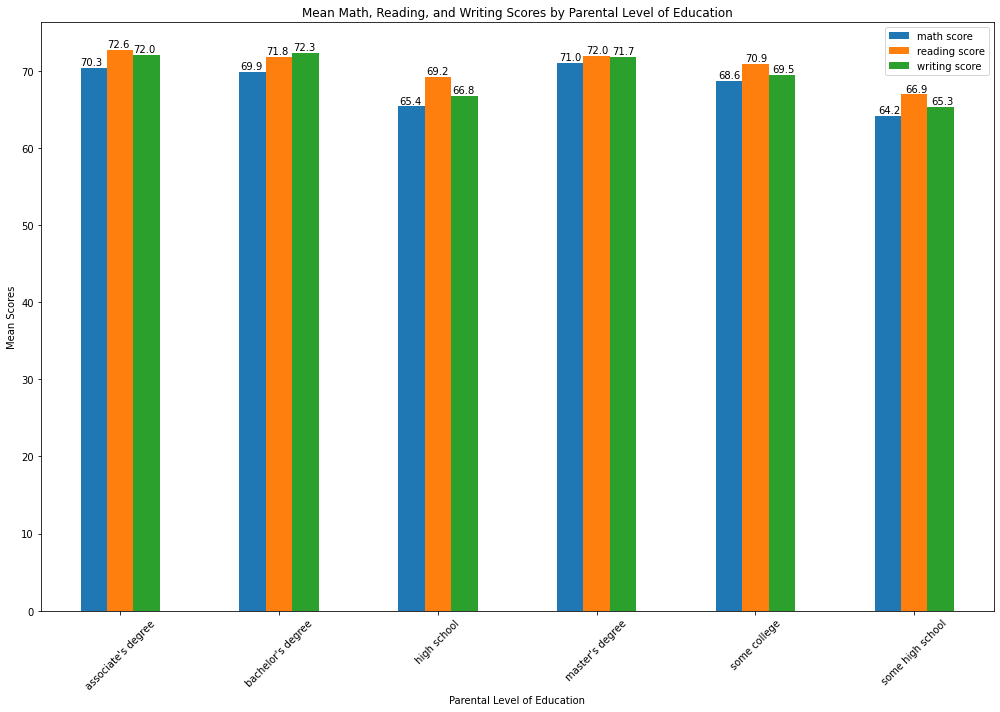

In [ ]:
# Plot the bar chart
ax = mean_scores_by_parental_education.plot(kind="bar", figsize=(14, 10), rot=45)
ax.set_xlabel("Parental Level of Education")
ax.set_ylabel("Mean Scores")
ax.set_title("Mean Math, Reading, and Writing Scores by Parental Level of Education")

# Add data labels
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

# Save the figure as an image file
plt.tight_layout()
plt.savefig("mean_scores_by_parental_education.png", dpi=300)

# Show the plot
plt.show()

### Using Spearman method

In [ ]:
def education_to_ordinal(education):
    education_levels = {
        'some high school': 1,
        'high school': 2,
        'some college': 3,
        'associate\'s degree': 4,
        'bachelor\'s degree': 5,
        'master\'s degree': 6
    }
    return education_levels.get(education, 0)

# Convert parental level of education to ordinal values
df_student_copy['parental education ordinal'] = df_student_copy['parental level of education'].apply(education_to_ordinal)

# Calculate Pearson correlation coefficients
spearman_correlations = df_student_copy[['parental education ordinal', 'math score', 'reading score', 'writing score']].corr(method='spearman')

# Display the correlation matrix
print(spearman_correlations.loc[['parental education ordinal'], ['math score', 'reading score', 'writing score']])

                            math score  reading score  writing score
parental education ordinal    0.145597       0.127571       0.169724


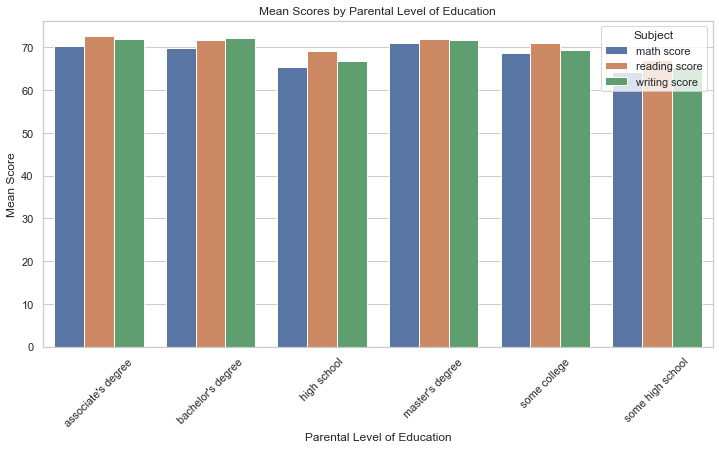

In [ ]:
# Calculate the mean scores for each parental level of education category
mean_scores_by_parental_education = df_student_copy.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

# Reset the index to convert the 'parental level of education' from index to a regular column
mean_scores_by_parental_education.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for creating bar plots with seaborn
melted_mean_scores = mean_scores_by_parental_education.melt(id_vars='parental level of education', var_name='subject', value_name='mean_score')

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_mean_scores, x='parental level of education', y='mean_score', hue='subject')
plt.title('Mean Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.show()

Insights:

The mean scores above show that students whose parents have a Master's degree tend to have the highest average scores in all three subjects, followed by students whose parents have an Associate's or Bachelor's degree. Students whose parents have some college education or only completed high school have lower average scores, while students whose parents have some high school education have the lowest average scores. This suggests that higher parental education levels are generally associated with better student performance, but the relationship is not very strong, as indicated by the weak Spearman correlation coefficients found earlier.     


To sum it up, **there is a weak positive relationship between parental level of education and student performance in math, reading, and writing.** This means that, generally, as the level of parental education increases, student performance in these subjects tends to improve slightly.       

The mean scores for each parental level of education show that students with parents who have higher levels of education (Master's, Bachelor's, and Associate's degrees) tend to have better average scores than students with parents who have lower levels of education (some college, high school, and some high school). However, the correlation is not very strong, as indicated by the weak Spearman correlation coefficients found earlier.

## 2. How does participation in a test preparation course impact student scores?        

In [ ]:
# Group the data by test preparation course status
grouped_by_test_prep = df_student_copy.groupby('test preparation course')

# Calculate the mean scores for each group
mean_scores_by_test_prep = grouped_by_test_prep[['math score', 'reading score', 'writing score']].mean()

# Display the results
print(mean_scores_by_test_prep)

                         math score  reading score  writing score
test preparation course                                          
completed                 70.334302      74.726744      75.808140
none                      66.486280      68.103659      65.643293


These results show that students who completed a test preparation course have higher average scores in math, reading, and writing than students who did not participate in such a course. This suggests that participation in a test preparation course positively impacts student performance across all three subjects.       

Boxplots

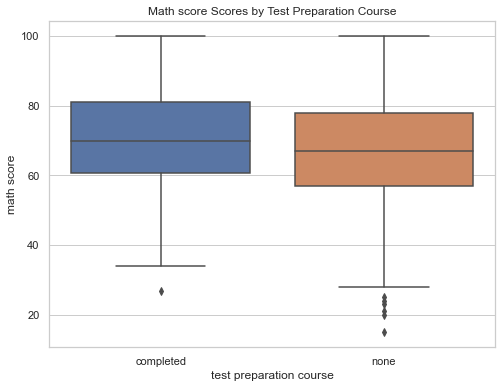

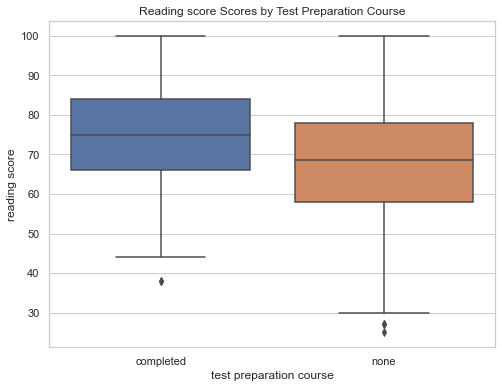

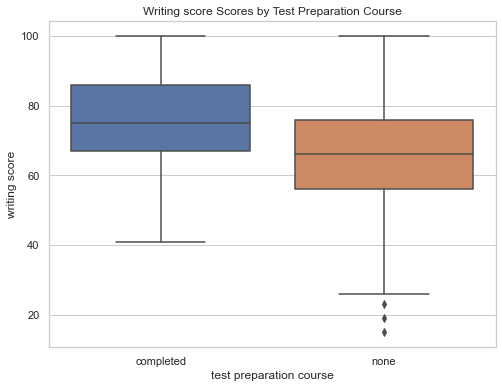

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a list of subjects
subjects = ['math score', 'reading score', 'writing score']

# Create box plots for each subject
for subject in subjects:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='test preparation course', y=subject, data=df_student_copy)
    plt.title(f'{subject.capitalize()} Scores by Test Preparation Course')
    plt.show()

Histograms

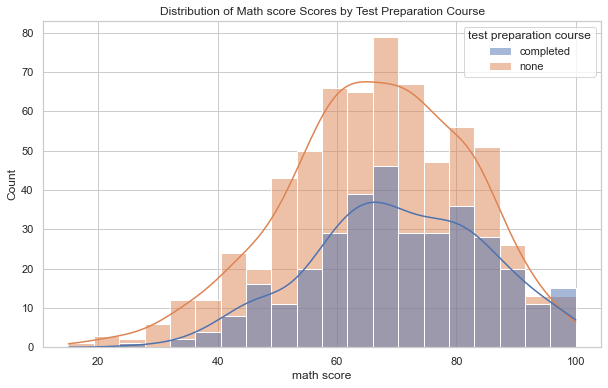

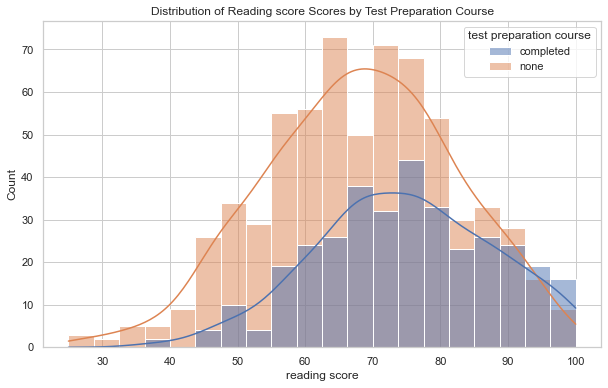

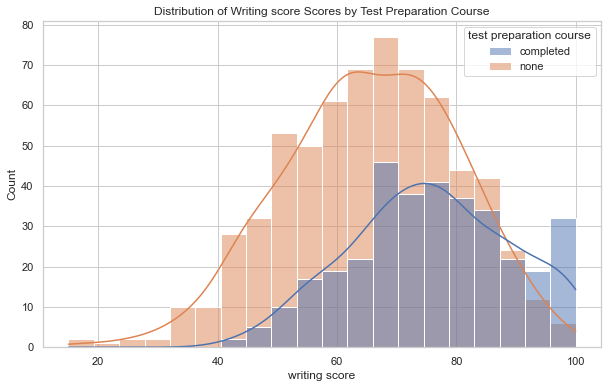

In [ ]:
# Create histograms for each subject
for subject in subjects:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_student_copy, x=subject, hue='test preparation course', kde=True, bins=20, alpha=0.5)
    plt.title(f'Distribution of {subject.capitalize()} Scores by Test Preparation Course')
    plt.show()

INSIGHT:    
To sum it up, participation in a test preparation course positively impacts student scores. Based on the analysis you provided earlier, students who completed a test preparation course have higher average scores in math, reading, and writing compared to those who did not participate in such a course.       

## 3. Are there any significant differences in performance based on gender or race/ethnicity?

### Gender

In [ ]:
# Calculate mean scores by gender
gender_mean_scores = df_student_copy.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print("Mean scores by gender:")
print(gender_mean_scores)

Mean scores by gender:
        math score  reading score  writing score
gender                                          
female    64.77439      73.473577      73.439024
male      70.75000      67.387795      64.976378


C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\2373285544.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y=subject, data=df_student_copy, ci=None)


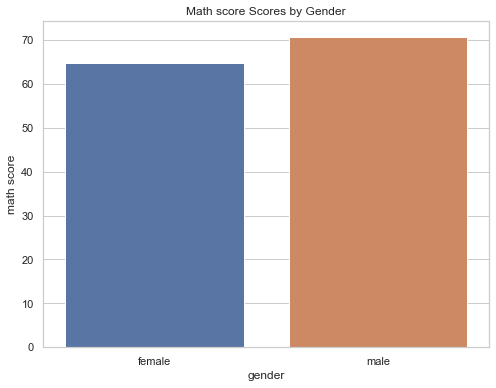

C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\2373285544.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y=subject, data=df_student_copy, ci=None)


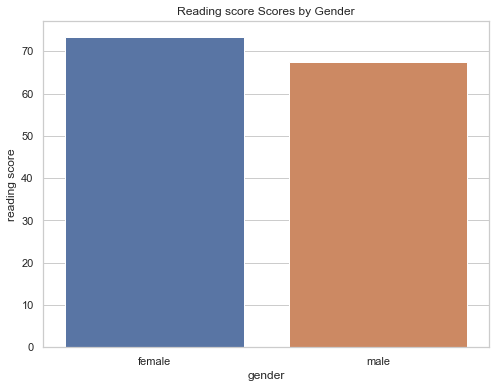

C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\2373285544.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y=subject, data=df_student_copy, ci=None)


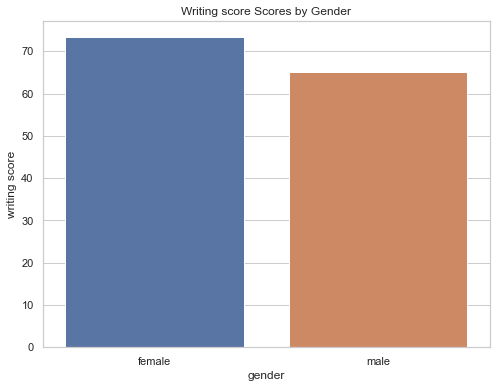

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create bar plots for gender
for subject in subjects:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='gender', y=subject, data=df_student_copy, ci=None)
    plt.title(f'{subject.capitalize()} Scores by Gender')
    plt.show()

Female students perform better on average in reading and writing compared to male students,     
while male students perform better on average in math. It's important to note that these differences are based on average scores and may not necessarily imply causation. Further analysis, such as hypothesis testing, can be conducted to determine if these differences are statistically significant.       

#### Hyphothesis testing for gender

In [ ]:
from scipy import stats

# Separate the data by gender
female_scores = df_student_copy[df_student_copy['gender'] == 'female']
male_scores = df_student_copy[df_student_copy['gender'] == 'male']

# Perform t-tests for math, reading, and writing scores
for subject in ['math score', 'reading score', 'writing score']:
    t_stat, p_value = stats.ttest_ind(female_scores[subject], male_scores[subject])
    print(f"{subject}: t-stat = {t_stat:.3f}, p-value = {p_value:.3e}")


math score: t-stat = -6.314, p-value = 4.084e-10
reading score: t-stat = 6.981, p-value = 5.339e-12
writing score: t-stat = 9.275, p-value = 1.068e-19


Based on the results of the independent two-sample t-tests, there are statistically significant differences in performance between female and male students for math, reading, and writing scores. The p-values are much smaller than the commonly used significance level of 0.05, which indicates that the differences in performance are unlikely to be due to random chance alone.      

*Why two-sample t-tests for hypothesis testing for gender?*     
I use independent two-sample t-tests for hypothesis testing for gender because I am comparing the means of two independent groups (males and females) on a continuous outcome variable (math, reading, and writing scores).     
The t-test is appropriate in this situation because it allows me to determine if there is a significant difference between the means of the two groups, assuming that the underlying population is normally distributed and has equal variances.        
Independent two-sample t-tests are a widely accepted and easy-to-interpret method for comparing the means of two independent samples, making it a suitable choice for analyzing the differences in performance based on gender.             

INSIGHTS:   
we can conclude that there are significant differences in performance based on gender for math, reading, and writing scores:        

1. Math scores: Male students perform significantly better on average compared to female students.      
2. Reading scores: Female students perform significantly better on average compared to male students.       
3. Writing scores: Female students perform significantly better on average compared to male students.       

These differences are statistically significant, which means they are unlikely to be due to random chance alone. However, it's important to note that this analysis does not reveal the underlying reasons for these differences, and further research would be needed to explore the factors contributing to the observed differences in performance based on gender.      

### Race/Ethnicity

In [ ]:
# Calculate mean scores by race/ethnicity
race_mean_scores = df_student_copy.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print("\nMean scores by race/ethnicity:")
print(race_mean_scores)


Mean scores by race/ethnicity:
                math score  reading score  writing score
race/ethnicity                                          
group A          65.696203      69.202532      67.848101
group B          64.070707      68.530303      66.717172
group C          65.510836      68.609907      66.804954
group D          68.879377      70.929961      71.058366
group E          77.426573      76.615385      75.034965


C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\3464192843.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y=subject, data=df_student_copy, ci=None)


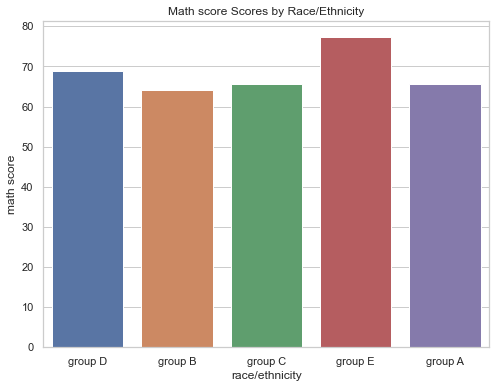

C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\3464192843.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y=subject, data=df_student_copy, ci=None)


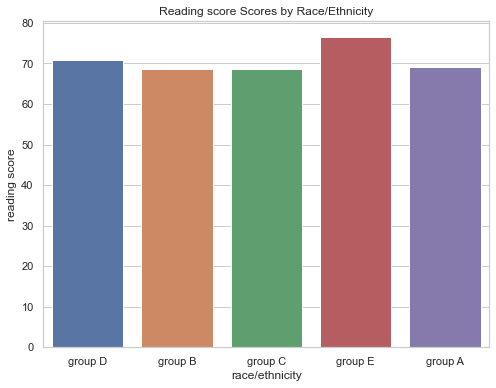

C:\Users\Pandu\AppData\Local\Temp\ipykernel_19428\3464192843.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y=subject, data=df_student_copy, ci=None)


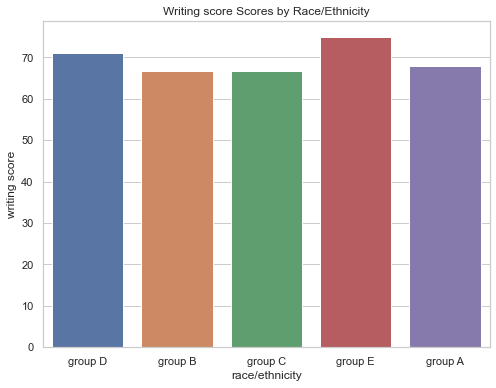

In [ ]:
# Create bar plots for race/ethnicity
for subject in subjects:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='race/ethnicity', y=subject, data=df_student_copy, ci=None)
    plt.title(f'{subject.capitalize()} Scores by Race/Ethnicity')
    plt.show()

These observed differences suggest that there might be variations in performance among different race/ethnicity groups. To determine if these differences are statistically significant, you can perform hypothesis testing, such as ANOVA (Analysis of Variance), which can help you understand if the differences in performance are likely due to random chance or if they are significant.          

#### Hyphothesis testing for race/ethnicity

In [ ]:
from scipy.stats import f_oneway


# Create separate DataFrames for each race/ethnicity group
groupA = df_student_copy[df_student_copy['race/ethnicity'] == 'group A']
groupB = df_student_copy[df_student_copy['race/ethnicity'] == 'group B']
groupC = df_student_copy[df_student_copy['race/ethnicity'] == 'group C']
groupD = df_student_copy[df_student_copy['race/ethnicity'] == 'group D']
groupE = df_student_copy[df_student_copy['race/ethnicity'] == 'group E']

# Perform one-way ANOVA tests for each subject
f_stat_math, p_value_math = f_oneway(groupA['math score'], groupB['math score'], groupC['math score'], groupD['math score'], groupE['math score'])
f_stat_reading, p_value_reading = f_oneway(groupA['reading score'], groupB['reading score'], groupC['reading score'], groupD['reading score'], groupE['reading score'])
f_stat_writing, p_value_writing = f_oneway(groupA['writing score'], groupB['writing score'], groupC['writing score'], groupD['writing score'], groupE['writing score'])

print("Math scores:")
print("F-statistic:", f_stat_math)
print("P-value:", p_value_math)

print("\nReading scores:")
print("F-statistic:", f_stat_reading)
print("P-value:", p_value_reading)

print("\nWriting scores:")
print("F-statistic:", f_stat_writing)
print("P-value:", p_value_writing)

Math scores:
F-statistic: 21.327639720047287
P-value: 6.787457736892939e-17

Reading scores:
F-statistic: 9.665646867684721
P-value: 1.1375470460352966e-07

Writing scores:
F-statistic: 10.302734512088241
P-value: 3.5423160599716694e-08


These findings suggest that there are significant differences in performance among the different race/ethnicity groups.     

INSIGHTS:       
There are significant differences in performance based on race/ethnicity. The one-way ANOVA tests for math, reading, and writing scores showed statistically significant differences among the race/ethnicity groups for all three subjects. The p-values for all tests were less than the commonly used significance level of 0.05, indicating that the observed differences in performance are unlikely to be due to random chance alone.     


However, it's important to note that this analysis does not reveal the underlying reasons for these differences. Further research would be needed to explore the factors contributing to the observed differences in performance based on race/ethnicity.       